### Motors AS active customers data 
- Definition of Active customer: 최근 15개월내 AS 재입고 차량 대수 
- 기준일자: 2.24. 7/21 (recent 15 months = 2023.4/22 ~ 2024. 7/21)
- raws: 54,540
- data 추출: 이용철 대리 

In [1]:
#!pip install pyarrow

In [2]:
#import pkg's
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#data loading 
import pyarrow

df = pd.read_parquet('data/motors_as_active4.parquet', engine='pyarrow')
print(df.shape)
df.head(2).T

(48162, 26)


,0,1
vin,5UX33DT08N9M34224,5UX43DT02N9N10833
as_branch,AS_천안,AS_천안
customer,김예지,ahn chi hoon david
tel_no,1073180152,1095821006
addr_1,충남,충남
addr_2,아산시,아산시
full_address,"충남 아산시 둔포면 아산밸리남로 81 802동 401호 (석곡리,아산테크노밸리 이지...",충청남도 아산시 둔포면 아산밸리남로 32-44 4호
DELIVERY_DEALER_NAME,None,None
DELIVERY_SHOWROOM_NAME,None,None
PERSON_GUBUN,개인,개인


--- 
### 박사님 지시사항 (2024.08.22)
- 1. 경쟁이 치열한 경기권 센터 3곳에 focus 하여 분석 진행 : 군포/동탄/안양 (fast shop인 안산은 제외)
- 2. 각 센터별 인근지역 vs. 비 인근지역 고객 비교 ~ 현재 현업이 정한 각 센터별 "인근 지역"이 적정하게 설정되어 있는지? 
    - 방문고객 주소지(지역) 분포, 인근지역 vs. 비 인근지역 고객 비중,  인근지역 vs. 비 인근지역의 서비스 타입 차이 
- 3. 핵심지역 고객 분석 ~ 서울/분당/수원/용인 지역 고객들이 어느 센터로 어떤 서비스를 받기 위해 방문하는지? 
---

In [4]:
## 군포, 동탄, 안양 센터 데이터 분리 
df_Gunpo = df[df['as_branch'] == 'AS_군포'] 
df_Dongtan = df[df['as_branch'] == 'AS_동탄'] 
df_Anyang = df[df['as_branch'] == 'AS_안양'] 

print('- 군포 데이터 건수 = ', df_Gunpo.shape[0])
print('- 동탄 데이터 건수 = ', df_Dongtan.shape[0])
print('- 안양 데이터 건수 = ', df_Anyang.shape[0])

print('-------------------------------------------------')

df_3center = df[df['as_branch'].isin(['AS_군포', 'AS_동탄', 'AS_안양'])] 

print('- 3개 센터 합계 건수 = ', df_3center.shape[0])

- 군포 데이터 건수 =  5984
- 동탄 데이터 건수 =  10650
- 안양 데이터 건수 =  6333
-------------------------------------------------
- 3개 센터 합계 건수 =  22967


--- 
#### 1. 군포센터 상세 분석
---

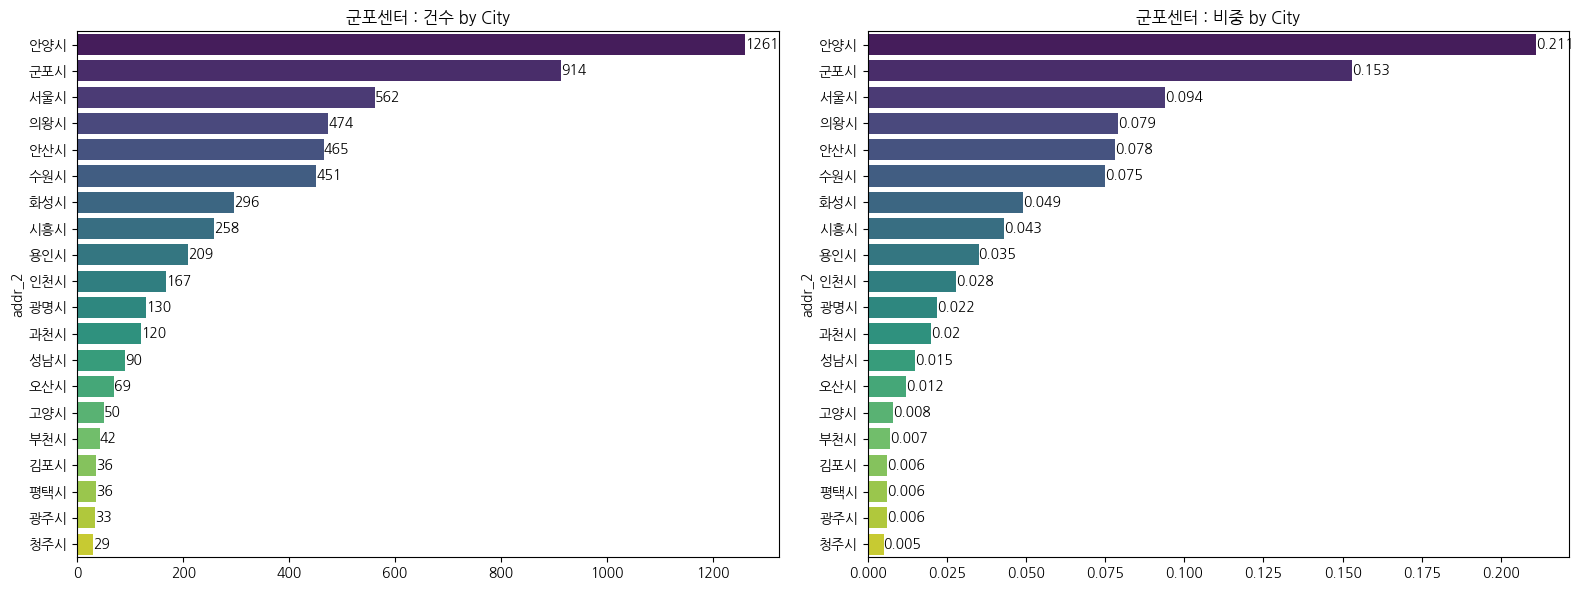

In [5]:
## 군포센터 방문고객의 주소지(city)

# 건수와 비중 데이터 생성
cnt_addr2_1 = df_Gunpo['addr_2'].value_counts().head(20)
cnt_addr2_2 = df_Gunpo['addr_2'].value_counts(normalize=True).round(3).head(20)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_1.values, y=cnt_addr2_1.index, palette="viridis", ax=axes[0])
axes[0].set_title('군포센터 : 건수 by City')

for index, value in enumerate(cnt_addr2_1.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_2.values, y=cnt_addr2_2.index, palette="viridis", ax=axes[1])
axes[1].set_title('군포센터 : 비중 by City')

for index, value in enumerate(cnt_addr2_2.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

- 현업이 군포센터의 인근지역으로 정의한 군포/안양/안산/의왕의 비중이 약 52.1%를 차지
- 서울(9.4%)과 수원(7.5%)의 비중이 안산과 거의 유사하다는 점에 주목할 필요가 있어 보임 

SERVICE_TYPE  Maintenance  Recall/TC   경수리   사고수리    소음   중수리     진단
addr_2                                                              
안양시                 424.0       96.0  51.0  431.0  21.0   7.0  193.0
군포시                 478.0       68.0  25.0  106.0  24.0  12.0  167.0
서울시                 207.0       30.0  27.0  106.0  39.0  16.0  122.0
의왕시                 240.0       29.0  19.0   83.0   8.0   4.0   81.0
안산시                  96.0       35.0  14.0  213.0   9.0   5.0   78.0
수원시                 208.0       43.0  13.0   69.0  12.0   3.0   94.0
화성시                 101.0       29.0   6.0   78.0  14.0   1.0   59.0
시흥시                  85.0       25.0   9.0   65.0   6.0   1.0   63.0
용인시                  87.0       16.0  16.0   26.0   8.0   3.0   49.0
인천시                  57.0       18.0   7.0   38.0   3.0   2.0   39.0
--------------------------------------------------------------------------------------------


<Figure size 1000x600 with 0 Axes>

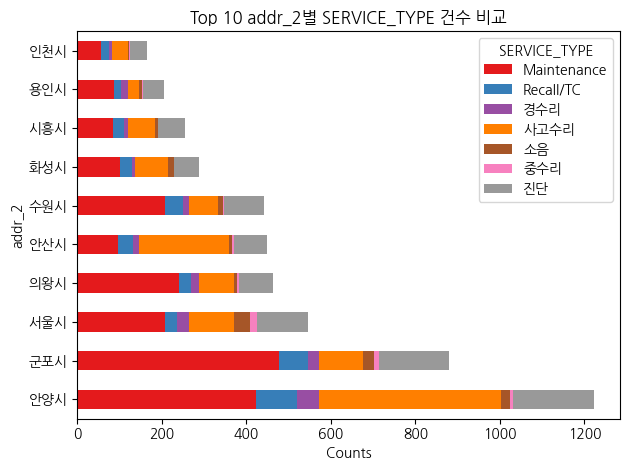

In [6]:
## city x service_type 

# addr_2별 SERVICE_TYPE의 건수 구하기
service_counts = df_Gunpo.groupby(['addr_2', 'SERVICE_TYPE']).size().reset_index(name='counts')

# Pivot table을 사용하여 addr_2별로 SERVICE_TYPE의 건수 비교
pivot_table = service_counts.pivot(index='addr_2', columns='SERVICE_TYPE', values='counts').fillna(0)

# 상위 10개의 addr_2 선택
top_10 = pivot_table.sum(axis=1).nlargest(10).index
pivot_table_top_10 = pivot_table.loc[top_10]
print(pivot_table_top_10)
print('--------------------------------------------------------------------------------------------')

# 차트 그리기
plt.figure(figsize=(10, 6))
pivot_table_top_10.plot(kind='barh', stacked=True, colormap="Set1")

# 차트 설정
plt.title('Top 10 addr_2별 SERVICE_TYPE 건수 비교')
plt.xlabel('Counts')
plt.ylabel('addr_2')
plt.legend(title='SERVICE_TYPE')
plt.tight_layout()

- 고객 주소가 군포/안양/서울/수원인 경우만 분리하여 분석 

SERVICE_TYPE  Maintenance  Recall/TC       경수리       사고수리        소음       중수리  \
addr_2                                                                          
군포시             54.318182   7.727273  2.840909  12.045455  2.727273  1.363636   
서울시             37.842779   5.484461  4.936015  19.378428  7.129799  2.925046   
수원시             47.058824   9.728507  2.941176  15.610860  2.714932  0.678733   
안양시             34.668847   7.849550  4.170074  35.241210  1.717089  0.572363   

SERVICE_TYPE         진단  
addr_2                   
군포시           18.977273  
서울시           22.303473  
수원시           21.266968  
안양시           15.780867  
--------------------------------------------------------------------------------------------


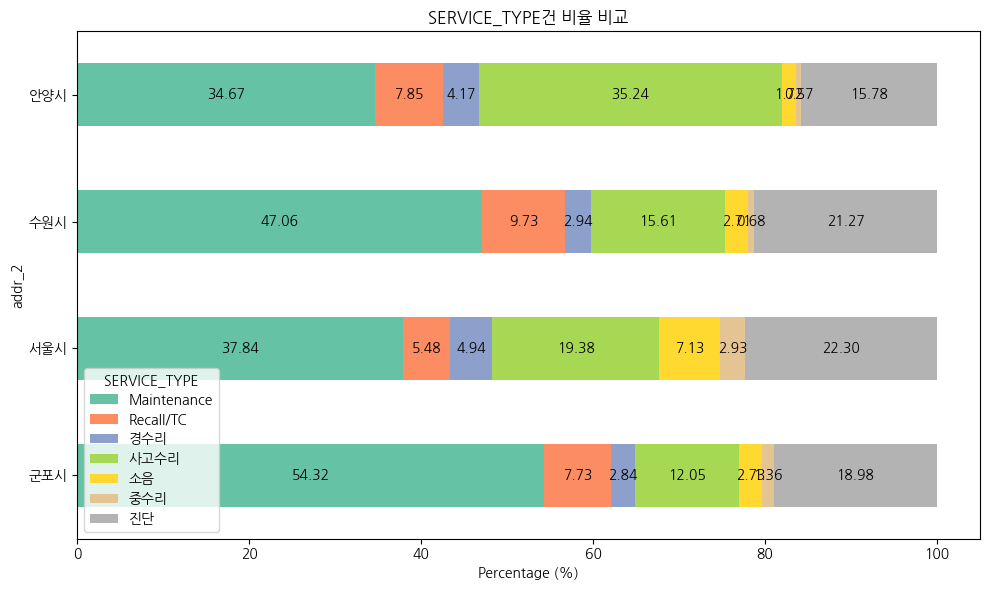

In [7]:
##  안양/군포 vs 서울/수원의 방문이유 비교 
df_Gunpo2 = df_Gunpo[df_Gunpo['addr_2'].isin(['안양시', '군포시', '서울시', '수원시'])]

# addr_2별 SERVICE_TYPE의 건수 구하기
service_counts = df_Gunpo2.groupby(['addr_2', 'SERVICE_TYPE']).size().reset_index(name='counts')

# Pivot table을 사용하여 addr_2별로 SERVICE_TYPE의 건수 비교
pivot_table = service_counts.pivot(index='addr_2', columns='SERVICE_TYPE', values='counts').fillna(0)

# 각 addr_2의 총 건수
total_counts = pivot_table.sum(axis=1)

# 비율로 변환
pivot_table_ratio = pivot_table.div(total_counts, axis=0) * 100

print(pivot_table_ratio)
print('--------------------------------------------------------------------------------------------')

# 차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table_ratio.plot(kind='barh', stacked=True, colormap="Set2", ax=ax)

# 각 막대 위에 값 표시
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f', label_type='center', fontsize=10, color='black')


# 차트 설정
plt.title('SERVICE_TYPE건 비율 비교')
plt.xlabel('Percentage (%)')
plt.ylabel('addr_2')
plt.legend(title='SERVICE_TYPE')
plt.tight_layout()


- 군포센터 인근지역인 군포/수원 고객들이 maintanance(오일/소모품 교환)를 위해 많이 방문했고, 
- 안양 고객들은 상대적으로 사고수리를 위해 방문한 경우가 많음. 안양센터가 메카닉(일방정비)샵이라 사고수리 건이 군포로 흡수되고 있는 것 아닐까? 
- 서울 고객들의 경우 maintanance와 사고수리 순으로 방문하고 있는데, 굳이 먼 지역에서 군포를 방문한 이유는 무엇일까? 
- 한편 현업에서 인근지역으로 분류한 안산, 의왕 대비 서울과 수원지역 고객수가 유사하거나 오히려 많다. 이유는?

--- 
#### 2. 동탄센터 상세 분석
---

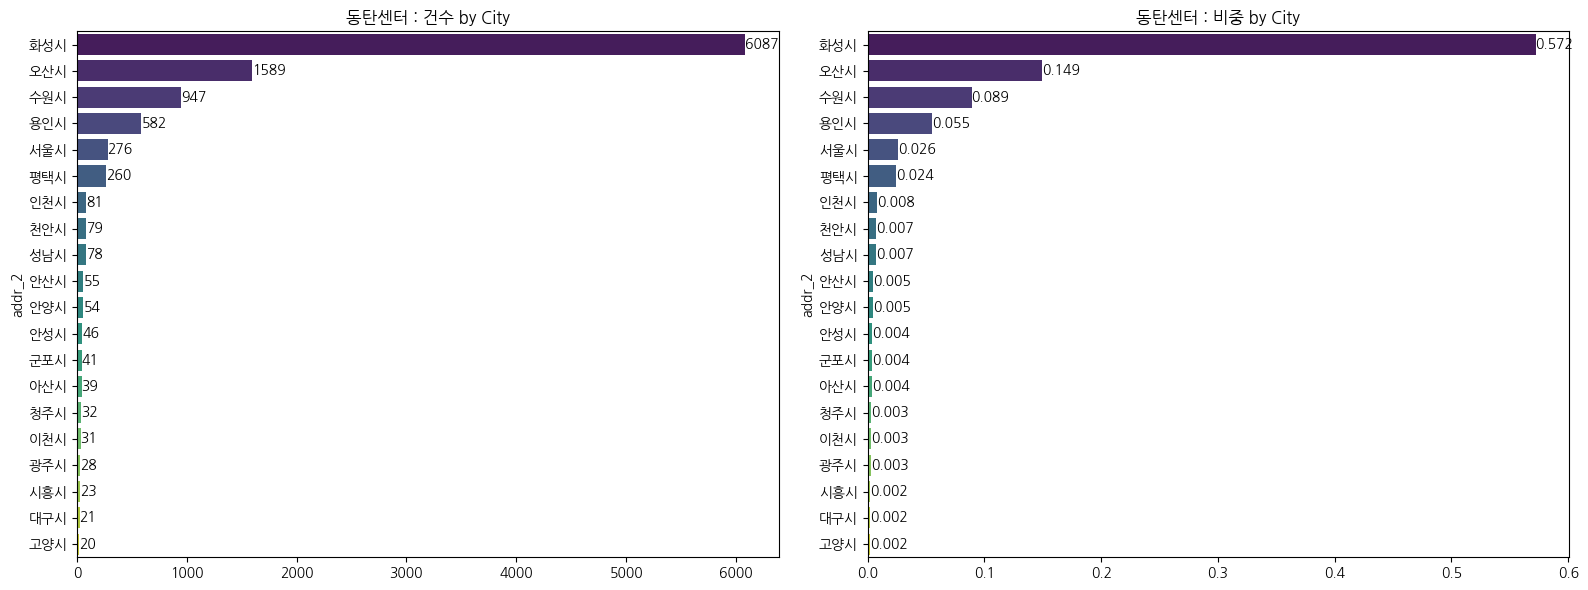

In [8]:
# 건수와 비중 데이터 생성
cnt_addr2_1 = df_Dongtan['addr_2'].value_counts().head(20)
cnt_addr2_2 = df_Dongtan['addr_2'].value_counts(normalize=True).round(3).head(20)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_1.values, y=cnt_addr2_1.index, palette="viridis", ax=axes[0])
axes[0].set_title('동탄센터 : 건수 by City')

for index, value in enumerate(cnt_addr2_1.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_2.values, y=cnt_addr2_2.index, palette="viridis", ax=axes[1])
axes[1].set_title('동탄센터 : 비중 by City')

for index, value in enumerate(cnt_addr2_2.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

- 동탄센터는 화성지역 고객들이 앞도적으로 많음 
- 현업이 인근지역으로 분류한 화성/오산/수원 합계시 약 81% 
- 거리상으로는 수원과 용인이 가까운데도 불구, 고객수는 적은 편 

SERVICE_TYPE  Maintenance  Recall/TC    경수리   사고수리    소음   중수리      진단
addr_2                                                                
화성시                3475.0      396.0  244.0  719.0  48.0  64.0  1012.0
오산시                 877.0      144.0   66.0  185.0  11.0  16.0   257.0
수원시                 464.0      195.0   29.0   81.0  12.0   8.0   134.0
용인시                 318.0       48.0   25.0   79.0   7.0  11.0    88.0
서울시                 126.0       24.0    6.0   68.0   0.0   4.0    43.0
평택시                 113.0       21.0    4.0   70.0   2.0   3.0    41.0
인천시                  30.0       23.0    2.0   10.0   1.0   0.0    13.0
천안시                  39.0        4.0    3.0   16.0   1.0   0.0    14.0
성남시                  34.0        5.0    3.0   15.0   2.0   0.0    17.0
안산시                  18.0       12.0    4.0    6.0   1.0   0.0    13.0
--------------------------------------------------------------------------------------------


<Figure size 1000x600 with 0 Axes>

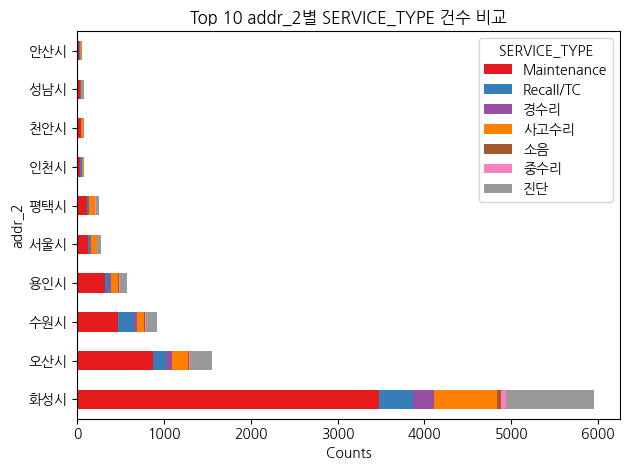

In [9]:
## city x service_type 

# addr_2별 SERVICE_TYPE의 건수 구하기
service_counts = df_Dongtan.groupby(['addr_2', 'SERVICE_TYPE']).size().reset_index(name='counts')

# Pivot table을 사용하여 addr_2별로 SERVICE_TYPE의 건수 비교
pivot_table = service_counts.pivot(index='addr_2', columns='SERVICE_TYPE', values='counts').fillna(0)

# 상위 10개의 addr_2 선택
top_10 = pivot_table.sum(axis=1).nlargest(10).index
pivot_table_top_10 = pivot_table.loc[top_10]
print(pivot_table_top_10)
print('--------------------------------------------------------------------------------------------')

# 차트 그리기
plt.figure(figsize=(10, 6))
pivot_table_top_10.plot(kind='barh', stacked=True, colormap="Set1")

# 차트 설정
plt.title('Top 10 addr_2별 SERVICE_TYPE 건수 비교')
plt.xlabel('Counts')
plt.ylabel('addr_2')
plt.legend(title='SERVICE_TYPE')
plt.tight_layout()

SERVICE_TYPE  Maintenance  Recall/TC       경수리       사고수리        소음       중수리  \
addr_2                                                                          
서울시             46.494465   8.856089  2.214022  25.092251  0.000000  1.476015   
용인시             55.208333   8.333333  4.340278  13.715278  1.215278  1.909722   
화성시             58.324941   6.646526  4.095334  12.067808  0.805639  1.074186   

SERVICE_TYPE         진단  
addr_2                   
서울시           15.867159  
용인시           15.277778  
화성시           16.985566  
--------------------------------------------------------------------------------------------


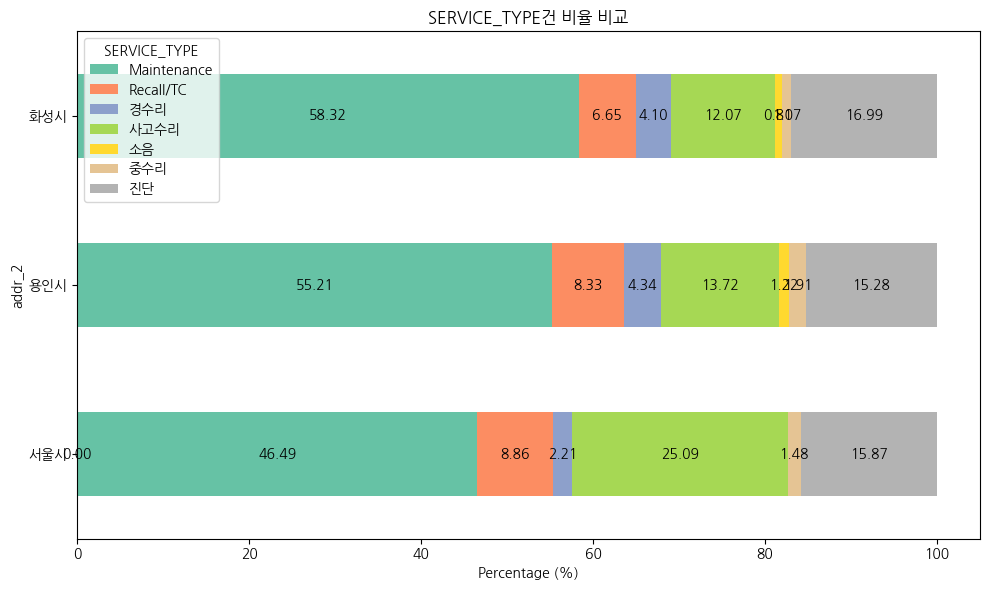

In [10]:
##  화성 vs 서울/용인의 방문이유 비교 
df_Dongtan2 = df_Dongtan[df_Dongtan['addr_2'].isin(['화성시', '용인시', '서울시'])]

# addr_2별 SERVICE_TYPE의 건수 구하기
service_counts = df_Dongtan2.groupby(['addr_2', 'SERVICE_TYPE']).size().reset_index(name='counts')

# Pivot table을 사용하여 addr_2별로 SERVICE_TYPE의 건수 비교
pivot_table = service_counts.pivot(index='addr_2', columns='SERVICE_TYPE', values='counts').fillna(0)

# 각 addr_2의 총 건수
total_counts = pivot_table.sum(axis=1)

# 비율로 변환
pivot_table_ratio = pivot_table.div(total_counts, axis=0) * 100

print(pivot_table_ratio)
print('--------------------------------------------------------------------------------------------')

# 차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table_ratio.plot(kind='barh', stacked=True, colormap="Set2", ax=ax)

# 각 막대 위에 값 표시
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f', label_type='center', fontsize=10, color='black')


# 차트 설정
plt.title('SERVICE_TYPE건 비율 비교')
plt.xlabel('Percentage (%)')
plt.ylabel('addr_2')
plt.legend(title='SERVICE_TYPE')
plt.tight_layout()


- 화성과 용인은 별다른 차이를 나타내지 않으나, 서울은 상대적으로 사고수리를 위해 동탄센터를 방문한 경우가 많았음 

--- 
#### 3. 안양센터 상세 분석
---

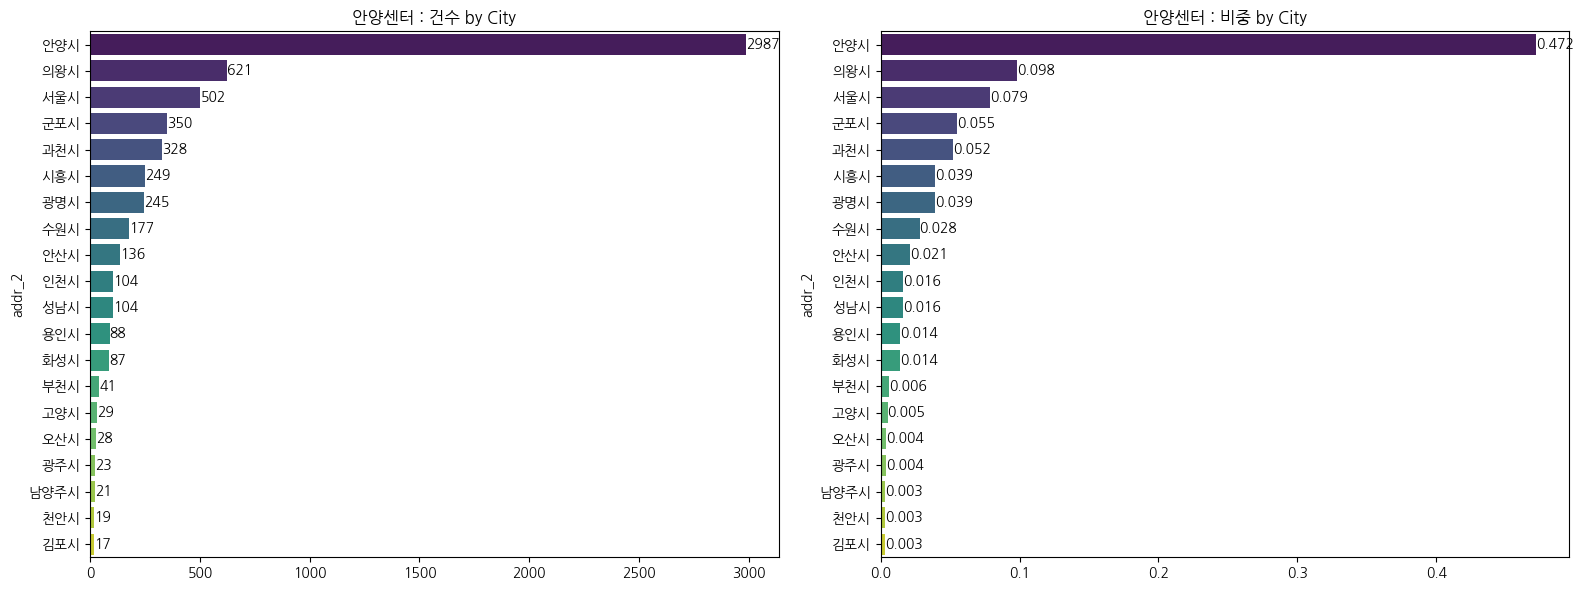

In [11]:
# 건수와 비중 데이터 생성
cnt_addr2_1 = df_Anyang['addr_2'].value_counts().head(20)
cnt_addr2_2 = df_Anyang['addr_2'].value_counts(normalize=True).round(3).head(20)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_1.values, y=cnt_addr2_1.index, palette="viridis", ax=axes[0])
axes[0].set_title('안양센터 : 건수 by City')

for index, value in enumerate(cnt_addr2_1.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_2.values, y=cnt_addr2_2.index, palette="viridis", ax=axes[1])
axes[1].set_title('안양센터 : 비중 by City')

for index, value in enumerate(cnt_addr2_2.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

- 안양센터는 안양지역 고객비중이 압도적으로 높음 
- 한편 현업의 인근지역 기준은 안양과 군포/과천/의왕이나, 서울의 비중이 군포/과천보다 높음 

SERVICE_TYPE  Maintenance  Recall/TC    경수리  사고수리    소음   중수리     진단
addr_2                                                              
안양시                2005.0      254.0  112.0   9.0  20.0  98.0  435.0
의왕시                 405.0       51.0   20.0   2.0   2.0  25.0  100.0
서울시                 311.0       32.0   19.0   0.0   5.0  12.0  112.0
군포시                 218.0       29.0   12.0   0.0   4.0   7.0   65.0
과천시                 230.0       25.0    6.0   3.0   3.0  11.0   45.0
시흥시                 153.0       19.0    7.0   0.0   5.0  12.0   47.0
광명시                 155.0       24.0    2.0   0.0   4.0  15.0   42.0
수원시                 103.0       18.0    6.0   1.0   3.0   5.0   35.0
안산시                  71.0       16.0    6.0   0.0   3.0   7.0   30.0
인천시                  59.0        9.0    2.0   0.0   2.0   5.0   26.0
--------------------------------------------------------------------------------------------


<Figure size 1000x600 with 0 Axes>

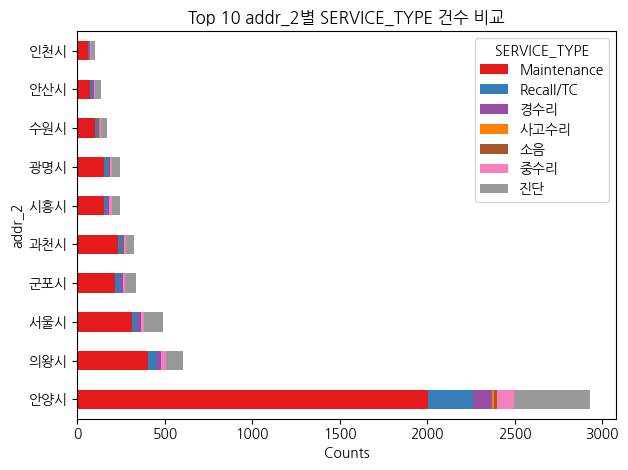

In [12]:
## city x service_type 

# addr_2별 SERVICE_TYPE의 건수 구하기
service_counts = df_Anyang.groupby(['addr_2', 'SERVICE_TYPE']).size().reset_index(name='counts')

# Pivot table을 사용하여 addr_2별로 SERVICE_TYPE의 건수 비교
pivot_table = service_counts.pivot(index='addr_2', columns='SERVICE_TYPE', values='counts').fillna(0)

# 상위 10개의 addr_2 선택
top_10 = pivot_table.sum(axis=1).nlargest(10).index
pivot_table_top_10 = pivot_table.loc[top_10]
print(pivot_table_top_10)
print('--------------------------------------------------------------------------------------------')

# 차트 그리기
plt.figure(figsize=(10, 6))
pivot_table_top_10.plot(kind='barh', stacked=True, colormap="Set1")

# 차트 설정
plt.title('Top 10 addr_2별 SERVICE_TYPE 건수 비교')
plt.xlabel('Counts')
plt.ylabel('addr_2')
plt.legend(title='SERVICE_TYPE')
plt.tight_layout()

SERVICE_TYPE  Maintenance  Recall/TC       경수리      사고수리        소음       중수리  \
addr_2                                                                         
서울시             63.340122   6.517312  3.869654  0.000000  1.018330  2.443992   
안양시             68.360041   8.660075  3.818616  0.306853  0.681896  3.341289   

SERVICE_TYPE         진단  
addr_2                   
서울시           22.810591  
안양시           14.831231  
--------------------------------------------------------------------------------------------


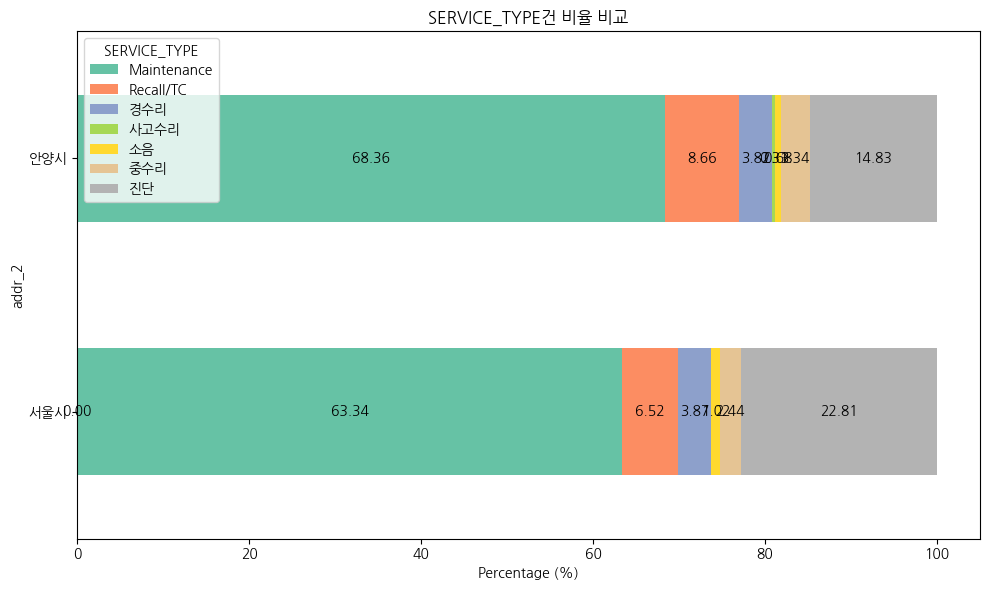

In [13]:
##  안양 vs 서울의 방문이유 비교 
df_Anyang2 = df_Anyang[df_Anyang['addr_2'].isin(['안양시', '서울시'])]

# addr_2별 SERVICE_TYPE의 건수 구하기
service_counts = df_Anyang2.groupby(['addr_2', 'SERVICE_TYPE']).size().reset_index(name='counts')

# Pivot table을 사용하여 addr_2별로 SERVICE_TYPE의 건수 비교
pivot_table = service_counts.pivot(index='addr_2', columns='SERVICE_TYPE', values='counts').fillna(0)

# 각 addr_2의 총 건수
total_counts = pivot_table.sum(axis=1)

# 비율로 변환
pivot_table_ratio = pivot_table.div(total_counts, axis=0) * 100

print(pivot_table_ratio)
print('--------------------------------------------------------------------------------------------')

# 차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table_ratio.plot(kind='barh', stacked=True, colormap="Set2", ax=ax)

# 각 막대 위에 값 표시
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f', label_type='center', fontsize=10, color='black')


# 차트 설정
plt.title('SERVICE_TYPE건 비율 비교')
plt.xlabel('Percentage (%)')
plt.ylabel('addr_2')
plt.legend(title='SERVICE_TYPE')
plt.tight_layout()


- 안양센터는 machanic shop이라는 특성상, 사고수리가 거의 없고 maintanance와 진단의 비중이 높음 
- 안양 vs. 서울 비교시 서울의 "진단"비중이 다소 높아 보이나, 이것은 안양지역 고객들의 maintanance를 안양센터에서 하는 비중이 높다고 보는 편이 정확해 보임 

--- 

### 군포/동탄/안양 3개 센터 관점의 리뷰 

1. 군포센터
- 상대적으로 다양한 지역의 고객들이 방문하고 있음 
- 안양과 군포지역 고객비중이 가장 높으나, 한편 서울과 수원지역 고객비중도 지리적으로 가까운 의왕이나 안산지역 비중과 유사함 
- 안양고객들은 삼천리 안양센터가 machanic shop이기 때문에, 사고수리를 위해 군포센터로 유입되는 것 같음 
- 서울과 수원 고객들은 왜 군포로 왔을까? 사고수리와 진단 비중이 다소 높은 것 같기는 한데, 현재 데이터로 단언하기 어려움 

2. 동탄센터
- 화성지역 고객들이 약 57%를 차지(압도적) 
- 지리적으로 도이티 수원, 한독 수원, 내쇼녈 평택 센터에 포위된 듯한 형태 때문에 화성지역 위주로 고객이 유입되는 것이 아닐까? 

3. 안양센터 
- 안양센터 또한 안양 고객들이 약 47%로 압도적. 주변지역에 타사 서비스센터가 다수인 까닭인 듯 

※ 결국 센터 인근지역의 maintanance 고객이 가장 많으나, 사고수리 (하나 더한다면 진단까지)를 위해서는 서울 등 다소 먼 거리의 고객들도 유입되는 경향이 보임.  

※ 이전의 분석에서도 센터 매출에 기여하는 것은 사고수리가 가장 중요했음 (full shop인 군포/동탄 등의 매출 절반이상이 사고수리에서 발생함). 

※ 센터로 부터 먼 거리(서울 등)의 고객들을 끌어들이기 위해서는, 사고수리를 어떻게 끌어올 것인가를 고민해야 될까? 